# Artificial Neural Networks and Deep Architectures
## Assignment 1

Isabella Rositi

Gustav Thorén

### 1. Generation of linearly-separable data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 100
mA = [ 1.5, 2.5]
mB = [-1.0, 0.0]
sigmaA = 0.5
sigmaB = 0.5

np.random.seed(45)

classA = np.zeros((3, 100))
classB = np.zeros((3,100))
classA[0,:] = sigmaA * np.random.randn(1,n) + mA[0]
classA[1,:] = sigmaA * np.random.randn(1,n) + mA[1]
classA[2,:] = 1
classB[0,:] = sigmaB * np.random.randn(1,n) + mB[0]
classB[1,:] = sigmaB * np.random.randn(1,n) + mB[1]
classB[2,:] = -1

In [ ]:
#Function which takes in an array of point (2,n) and corresponding labels (1,n)  and then prints a scatter plot for the data
def printData(data, labels):
  plt.scatter(data[0,:], data[1,:], c=labels)


#Function which prints the partition from the weight (1, 3) (with the bias as the third element) in the same space as the data (2, 2n)
def printPartition(weight, data, color='g', bias = True):
    points=100
    x=np.linspace(np.min(data[0,:]), np.max(data[0,:]), points)
    if bias == True:
        y=(weight[2] + x*weight[0]) / (-weight[1])
    else:
        y= (x*weight[0]) / (-weight[1])
    plt.xlabel("x1")
    plt.ylabel("x2")
    #Making it look nicer by removing excessive points
    ymin=np.min(data[1,:])
    ymax=np.max(data[1,:])
    index1, index2 = 0, (points-1)
    firstFound=False
    for i in range(points):
        if not firstFound and ymin<y[i]<ymax: #First index
            firstFound=True
            index1=i
        if firstFound and (y[i]<ymin or y[i]>ymax): #Second index
            index2=i
            break
    x=x[index1:index2]
    y=y[index1:index2]

    plt.plot(x,y,c=color)

In [ ]:
con = np.concatenate((classA, classB), axis=1)
print(np.shape(con))

np.random.shuffle(con.T)
t = con[2,:]
data = con[:2,:]
x = np.vstack((data, [1]*200))

(3, 200)


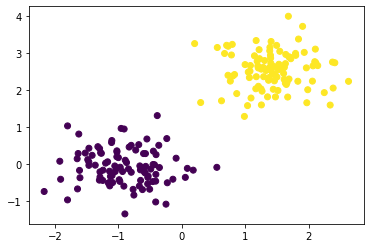

In [ ]:
printData(data, t)

### Classification with a single-layer perceptron and analysis

Perceptron rule

Found 3 errors in epoch 1
Found 0 errors in epoch 2
Found 0 errors in epoch 3
Found 0 errors in epoch 4
Found 0 errors in epoch 5


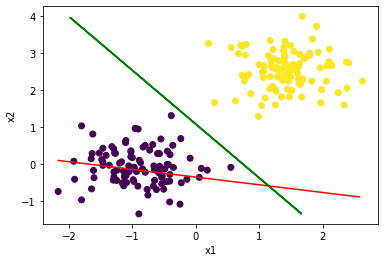

In [ ]:
#perceptron rule
np.random.seed(12)

w_perceptron=np.random.rand(3)*5
lr_perceptron=1

printData(data,t)
printPartition(w_perceptron, data, "r")
for s in range(5):  #How many time the algorithm go through the dataset (epochs)
    errorCount=0
    for i in range(len(t)):
        classification = np.sign(np.dot(w_perceptron, x[:,i]))
        if classification!=t[i]:  #Missclassification
            errorCount+=1
            if classification==-1:  #false negative error
                w_perceptron = w_perceptron + lr_perceptron * x[:,i]
            else:                   #false positive error
                w_perceptron = w_perceptron - lr_perceptron * x[:,i]
    print("Found {} errors in epoch {}".format(errorCount, s+1))
    printPartition(w_perceptron, data)

Delta rule

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
Cost Function: 0.3226184269113347
Cost Function: 0.2151359819809724
Cost Function: 0.12863477401905177
Cost Function: 0.07038598582986434
Cost Function: 0.03469882274302909
Cost Function: 0.014565607331243575
Cost Function: 0.004452972297766861
Cost Function: 0.000507356703793216
Cost Function: 0.00018537508284712992
Cost Function: 0.001859562402256688


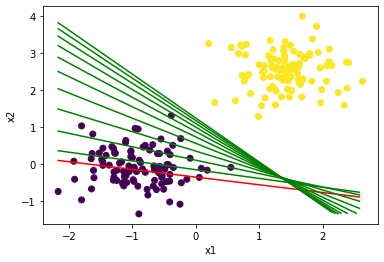

In [ ]:
#delta rule - sequential
%time

np.random.seed(12)

w_delta = np.random.rand(3)
lr_delta = 0.001

printData(data,t)
printPartition(w_delta, data, "r")
for s in range(10):  #How many time the algorithm go through the dataset (epochs)
    for i in range(len(t)):
        error = t[i] - np.dot(w_delta.T, x[:,i])
        w_delta += lr_delta*error*x[:,i]
    cost_function = np.square(error).mean()/2
    print("Cost Function:", cost_function)
    printPartition(w_delta, data)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs
Cost Function: 0.24077861805335019
Cost Function: 0.16774812570079553
Cost Function: 0.12091058473473487
Cost Function: 0.09084473009298304
Cost Function: 0.07152622839364954
Cost Function: 0.059095865069840096
Cost Function: 0.05108133339843663
Cost Function: 0.045898741876075365
Cost Function: 0.042533298061173314
Cost Function: 0.04033476601984358


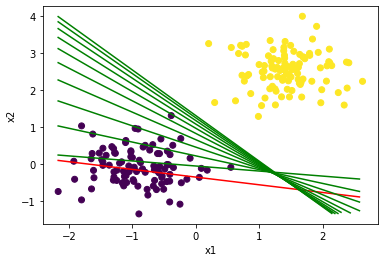

In [ ]:
#delta rule - batch
%time

np.random.seed(12)

w_delta = np.random.rand(3)
lr_delta = 0.001


printData(data,t)
printPartition(w_delta, data, "r")
for s in range(10):  #How many time the algorithm go through the dataset (epochs)
    w_acc = 0
    for i in range(len(t)):
        error = t[i] - np.dot(w_delta.T, x[:,i])
        w_diff = lr_delta*error*x[:,i]
        w_acc += w_diff
    w_delta += w_acc
    e = t - np.dot(w_delta.T, x)
    cost_function = np.square(e).mean()/2
    print("Cost Function:", cost_function)
    printPartition(w_delta, data)

The same result reached with the batch approach after 10 epochs (0.040) is achieved with the sequential approach just after 5 epochs (0.034).

Cost Function: 0.23828977306105614
Cost Function: 0.20803460086188047
Cost Function: 0.1849354276180005
Cost Function: 0.16637107464613288
Cost Function: 0.15144542628543076
Cost Function: 0.13944524360298755
Cost Function: 0.12979712755172254
Cost Function: 0.12204006702881784
Cost Function: 0.11580341029331048
Cost Function: 0.1107891542975374
Cost Function: 0.10675770535663284
Cost Function: 0.1035164307633889
Cost Function: 0.10091045431600978
Cost Function: 0.0988152559460692
Cost Function: 0.0971307218383965
Cost Function: 0.09577636074274855
Cost Function: 0.09468745790068084
Cost Function: 0.09381198281263142
Cost Function: 0.09310810309059878
Cost Function: 0.09254218560208112


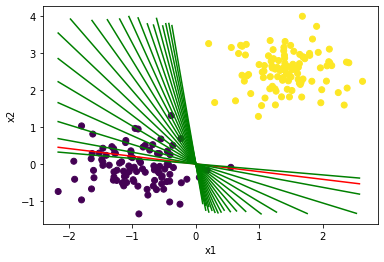

In [ ]:
#delta rule - batch (no bias)

np.random.seed(12)

w_delta = np.random.rand(3)[:2]
lr_delta = 0.001


printData(data,t)
printPartition(w_delta, data, "r", bias = False)
for s in range(20):  #How many time the algorithm go through the dataset (epochs)
    w_acc = 0
    for i in range(len(t)):
        error = t[i] - np.dot(w_delta.T, data[:,i])
        w_diff = lr_delta*error*data[:,i]
        w_acc += w_diff
    w_delta += w_acc
    e = t - np.dot(w_delta.T, data)
    cost_function = np.square(e).mean()/2
    print("Cost Function:", cost_function)
    printPartition(w_delta, data, bias = False)

Without bias included, in order to achieve results comparable more epochs are needed. However, even after 20 epochs, the results are slightly worse.

In [ ]:
# Change of parameters:

n = 100
mA = [2.5, 2.5]
mB = [-2.0, -2.5]
sigmaA = 0.5
sigmaB = 0.5

np.random.seed(45)

classA = np.zeros((3, 100))
classB = np.zeros((3,100))
classA[0,:] = sigmaA * np.random.randn(1,n) + mA[0]
classA[1,:] = sigmaA * np.random.randn(1,n) + mA[1]
classA[2,:] = 1
classB[0,:] = sigmaB * np.random.randn(1,n) + mB[0]
classB[1,:] = sigmaB * np.random.randn(1,n) + mB[1]
classB[2,:] = -1

con = np.concatenate((classA, classB), axis=1)
np.random.shuffle(con.T)

t = con[2,:]
data = con[:2,:]
x = np.vstack((data, [1]*200))

Cost Function: 0.4970400158340109
Cost Function: 0.3055340607033965
Cost Function: 0.19187268524471934
Cost Function: 0.12438458205610434
Cost Function: 0.0842843413125738
Cost Function: 0.060429646171121496
Cost Function: 0.046211575350983865
Cost Function: 0.03771012888902661
Cost Function: 0.03260020361536636
Cost Function: 0.029502687556377066
Cost Function: 0.02759957050583861
Cost Function: 0.026405652154074
Cost Function: 0.025633133904256606
Cost Function: 0.02511130336994368
Cost Function: 0.024738896338564267
Cost Function: 0.02445584092429644
Cost Function: 0.02422649799994657
Cost Function: 0.024029720488573502
Cost Function: 0.0238529571679738
Cost Function: 0.023688755422341536


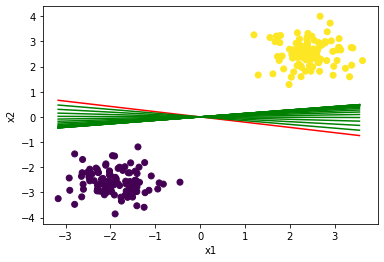

In [ ]:
#delta rule - batch (no bias)

np.random.seed(12)

w_delta = np.random.rand(3)[:2]
lr_delta = 0.0001


printData(data,t)
printPartition(w_delta, data, "r", bias = False)
for s in range(20):  #How many time the algorithm go through the dataset (epochs)
    w_acc = 0
    for i in range(len(t)):
        error = t[i] - np.dot(w_delta.T, data[:,i])
        w_diff = lr_delta*error*data[:,i]
        w_acc += w_diff
    w_delta += w_acc
    e = t - np.dot(w_delta.T, data)
    cost_function = np.square(e).mean()/2
    print("Cost Function:", cost_function)
    printPartition(w_delta, data, bias = False)

- plot decision boundary
- perceptron learning (seq)
- delta rule (seq)
- delta rule (batch)
- no bias for delta rule (batch)

# **Linear non-separable data**




In [ ]:
def create_data(n, dims, A_dist, A_sigma, B_dist, B_sigma):
    class_A = np.random.randn(n, dims) * A_sigma + A_dist
    class_B = np.random.randn(n, dims) * B_sigma + B_dist

    # Adds the bias input as a column at index [:, dims + 1]
    class_A = np.c_[class_A, np.ones(n)]
    class_B = np.c_[class_B, np.ones(n)]

    target_A, target_B = create_target_vector(n, LEARN_TYPE)

    train_data, targets = merge_data(class_A, class_B, target_A, target_B)

    return train_data, targets


def create_multicluster_data(n, dims, A_dist, A_sigma, B_dist, B_sigma):
    half_n = int(np.floor(n * 0.5))

    class_A = np.random.randn(n, dims)

    class_A[0:half_n, 0] = class_A[0:half_n, 0] * A_sigma - A_dist[0]
    class_A[half_n:, 0] = class_A[half_n:, 0] * A_sigma + A_dist[0]
    class_A[:, 1] = class_A[:, 1] * A_sigma + A_dist[1]
    class_B = np.random.randn(n, dims) * B_sigma + B_dist

    # Adds the bias input as a column at index [:, dims + 1]
    class_A = np.c_[class_A, np.ones(n)]
    class_B = np.c_[class_B, np.ones(n)]

    target_A, target_B = create_target_vector(n, LEARN_TYPE)

    train_data, targets = merge_data(class_A, class_B, target_A, target_B)

    return train_data, targets


def create_target_vector(n, learning_type):
    target_A = np.ones(n)
    if learning_type.lower() == "delta":
        target_B = -np.ones(n)
    else:
        target_B = np.zeros(n)
    return target_A, target_B


def merge_data(class_A, class_B, target_A, target_B):
    training_data = np.concatenate((class_A, class_B))
    targets = np.concatenate((target_A, target_B))
    return training_data, targets


def shuffle_data(training_data, targets):

    perm = np.random.permutation(len(targets))
    shuffled_train = training_data[perm]
    shuffled_targets = targets[perm]
    return shuffled_train.T, shuffled_targets

def check_treshold(y_prime):
    return 1 if y_prime >= 0 else 0

In [ ]:
RANDOM_SEED = 12

def perceptron_learning(inputs, targets):
    np.random.seed(RANDOM_SEED)

    n = len(inputs[0, :])
    w_perceptron = np.random.rand(3)
    lr_perceptron = 0.001

    printData(inputs, targets)
    printPartition(w_perceptron, inputs, "r")
    for s in range(EPOCHS):  # How many times the algorithm go through the dataset (epochs)
        errorCount = 0
        for i in range(n):
            y_prime = np.dot(w_perceptron, inputs[:, i])
            classification = check_treshold(y_prime)
            if classification != targets[i]:  # Miss-classification
                errorCount += 1
                if classification == 0 and targets[i] == 1:  # false negative error
                    w_perceptron = w_perceptron + lr_perceptron * inputs[:, i]
                else:  # false positive error
                    w_perceptron = w_perceptron - lr_perceptron * inputs[:, i]

        print("Found {} errors in epoch {}".format(errorCount, s + 1))
        # Remove comment tag to print boundary for every other epoch
        if s % 2 != 0:
          printPartition(w_perceptron, inputs, color="g")
    printPartition(w_perceptron, inputs, color="g")
    plt.show()


def delta_seq(inputs, targets):
    np.random.seed(RANDOM_SEED)

    w_delta = np.random.rand(3)
    lr_delta = 0.001

    printData(inputs, targets)
    printPartition(w_delta, inputs, "r")
    for s in range(EPOCHS):  # How many times the algorithm go through the dataset (epochs)
        for i in range(len(targets)):
            error = targets[i] - np.dot(w_delta.T, inputs[:, i])
            w_delta += lr_delta * error * inputs[:, i]
        cost_function = np.square(error).mean() / 2
        print("Epochs:",s+1, "Cost Function:", cost_function)
        # Uncomment to print boundary of every other epoch
        if s % 2 != 0:
          printPartition(w_delta, inputs, color="g")
    printPartition(w_delta, inputs, color="g")

**Perceptron Learning on full training data**

Found 69 errors in epoch 1
Found 61 errors in epoch 2
Found 54 errors in epoch 3
Found 52 errors in epoch 4
Found 48 errors in epoch 5
Found 49 errors in epoch 6
Found 50 errors in epoch 7
Found 52 errors in epoch 8
Found 50 errors in epoch 9
Found 50 errors in epoch 10
Found 48 errors in epoch 11
Found 47 errors in epoch 12
Found 45 errors in epoch 13
Found 42 errors in epoch 14
Found 42 errors in epoch 15
Found 38 errors in epoch 16
Found 36 errors in epoch 17
Found 35 errors in epoch 18
Found 34 errors in epoch 19
Found 33 errors in epoch 20
Found 32 errors in epoch 21
Found 32 errors in epoch 22
Found 31 errors in epoch 23
Found 31 errors in epoch 24
Found 31 errors in epoch 25
Found 30 errors in epoch 26
Found 30 errors in epoch 27
Found 30 errors in epoch 28
Found 28 errors in epoch 29
Found 28 errors in epoch 30
Found 26 errors in epoch 31
Found 26 errors in epoch 32
Found 25 errors in epoch 33
Found 23 errors in epoch 34
Found 22 errors in epoch 35
Found 21 errors in epoch 36
F

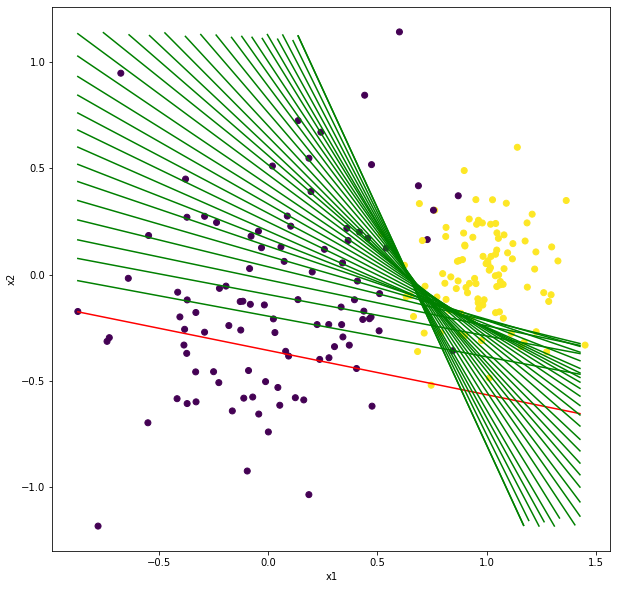

Epochs: 1 Cost Function: 0.6229265124732344
Epochs: 2 Cost Function: 0.557132248221474
Epochs: 3 Cost Function: 0.4998947124479011
Epochs: 4 Cost Function: 0.44969895717525105
Epochs: 5 Cost Function: 0.4053778506984274
Epochs: 6 Cost Function: 0.3660196869457082
Epochs: 7 Cost Function: 0.33090225028566805
Epochs: 8 Cost Function: 0.2994453731714755
Epochs: 9 Cost Function: 0.27117653133776126
Epochs: 10 Cost Function: 0.24570570181749934
Epochs: 11 Cost Function: 0.22270684831682272
Epochs: 12 Cost Function: 0.20190417904567945
Epochs: 13 Cost Function: 0.18306186211135023
Epochs: 14 Cost Function: 0.1659762604507218
Epochs: 15 Cost Function: 0.15047001333921453
Epochs: 16 Cost Function: 0.13638747921386857
Epochs: 17 Cost Function: 0.12359118825736001
Epochs: 18 Cost Function: 0.11195904893338728
Epochs: 19 Cost Function: 0.10138212153348519
Epochs: 20 Cost Function: 0.09176282153320509
Epochs: 21 Cost Function: 0.08301345160646867
Epochs: 22 Cost Function: 0.07505498736467793
Epoch

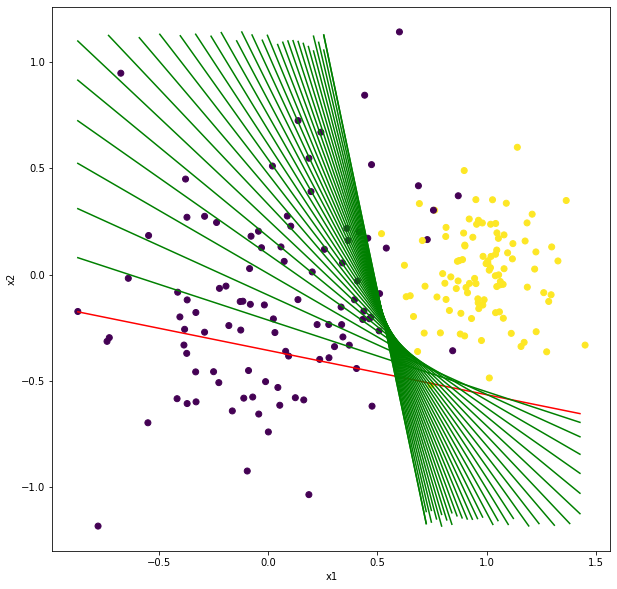

In [ ]:
EPOCHS = 60
LEARN_TYPE = "perceptron"

def not_linearly_separable():
  # Creates 2 clusters of data that are not linearly separable and uses both
  # perceptron learning and delta rule to find a decision boundary
    plt.rcParams["figure.figsize"] = (10,10)
    np.random.seed(45)

    n = 100
    dist_A = [1.0, 0.0]
    dist_B = [0.0, -0.1]
    sigma_A, sigma_B = 0.2, 0.4

    inputs, targets = create_data(n, 2, dist_A, sigma_A, dist_B, sigma_B)
    x, t = shuffle_data(inputs, targets)

    perceptron_learning(x, t)

    t = np.array([-1 if i == 0 else 1 for i in t])

    delta_seq(x, t)


not_linearly_separable()

Perceptron learning seems to quickly find a local minima and keeps oscillating until max epochs have been reached.

Delta rule seems to slowly converge towards a decision boundary that intuitibly looks better than the Perceptron learning one. However, it takes many more epochs to reach this boundary.

Init boundary = red \\
Every other epoch boundary = blue \\
Max epoch boundary = green

In [ ]:
# A bunch of subsample functions, not optimal at all but had to do it quick

def first_subsample(n, inputs, targets):
  # Function that removes 25% of the inputs from class A and 25% from class B
  # Outputs 150 data points
  train_n = int(np.floor(n * 0.75))

  class_A, class_B = inputs[:n], inputs[n:]
  targets_A, targets_B = targets[:n], targets[n:]

  idx = np.arange(n)
  np.random.shuffle(idx)

  train_A = class_A[idx[:train_n],:]
  train_B = class_B[idx[:train_n],:]

  test_A = class_A[idx[train_n:], :]
  test_B = class_A[idx[train_n:], :]

  train_t_A = targets_A[idx[:train_n]]
  train_t_B = targets_B[idx[:train_n]]

  test_t_A = targets_A[idx[train_n:]]
  test_t_B = targets_B[idx[train_n:]]

  train_data, train_targets = merge_data(train_A, train_B, train_t_A, train_t_B)
  test_data, test_targets = merge_data(test_A, test_B, test_t_A, test_t_B)

  train_data, train_targets = shuffle_data(train_data, train_targets)
  test_data, test_targets = shuffle_data(test_data, test_targets)

  return train_data, train_targets, test_data, test_targets


def subsample_half(n, inputs, targets, _class):
  # Removes 50% of the inputs from class A or B
  train_n = int(np.floor(n * 0.5))
  class_A, class_B = inputs[:n], inputs[n:]
  targets_A, targets_B = targets[:n], targets[n:]

  idx = np.arange(n)
  np.random.shuffle(idx)
  if _class.lower() == "a":

    train_A = class_A[idx[:train_n],:]
    train_t_A = targets_A[idx[:train_n]]

    test_data = class_A[idx[train_n:], :]
    test_targets = targets_A[idx[train_n:]]

    train_data, train_targets = merge_data(train_A, class_B, train_t_A, targets_B)

  else:
    train_B = class_B[idx[:train_n],:]
    train_t_B = targets_B[idx[:train_n]]

    test_data = class_B[idx[train_n:], :]
    test_targets = targets_B[idx[train_n:]]

    train_data, train_targets = merge_data(class_A, train_B, targets_A, train_t_B)

  train_data, train_targets = shuffle_data(train_data, train_targets)
  test_data, test_targets = shuffle_data(test_data, test_targets)

  print(test_data.shape)
  return train_data, train_targets, test_data, test_targets


def subsample_class_A(n, inputs, targets):
  # Removes 20% of class A inputs where x-coordinate is less than zero
  # and removes 80% of class A inputs where x-coordinare is more than zero
  n_below_zero = int(np.floor(n * 0.8))
  n_above_zero = int(np.floor(n * 0.2))

  class_A, class_B = inputs[:n], inputs[n:]
  targets_A, targets_B = targets[:n], targets[n:]

  A_below_zero = class_A[class_A[:, 0] < 0]
  A_above_zero = class_A[class_A[:, 0] > 0]

  idx_below = np.arange(A_below_zero.shape[0])
  idx_above = np.arange(A_above_zero.shape[0])

  np.random.shuffle(idx_below)
  np.random.shuffle(idx_above)

  train_A_below = A_below_zero[idx_below[:n_below_zero], :]
  train_A_above = A_above_zero[idx_above[:n_above_zero], :]

  test_A_below = A_below_zero[idx_below[n_below_zero:], :]
  test_A_above = A_above_zero[idx_above[n_above_zero:], :]


  train_A = np.concatenate((train_A_below, train_A_above))
  train_t_A = np.ones(train_A.shape[0])

  test_data = np.concatenate((test_A_below, test_A_above))
  test_targets = np.ones(test_data.shape[0])

  train_data, train_targets = merge_data(train_A, class_B, train_t_A, targets_B)
  train_data, train_targets = shuffle_data(train_data, train_targets)

  test_data, test_targets = shuffle_data(test_data, test_targets)

  return train_data, train_targets, test_data, test_targets

BATCH DELTA RULE - ALL INPUTS
________________________________
Epoch 1  | Train_Sensitivity: 0.42   | Train_Specificity: 0.38  
Epoch 1  - MSE of train_data: 0.4512  | MSE test_data: 0.4512
Epoch 2  | Train_Sensitivity: 0.4    | Train_Specificity: 0.38  
Epoch 2  - MSE of train_data: 0.3756  | MSE test_data: 0.3756
Epoch 3  | Train_Sensitivity: 0.41   | Train_Specificity: 0.38  
Epoch 3  - MSE of train_data: 0.3658  | MSE test_data: 0.3658
Epoch 4  | Train_Sensitivity: 0.4    | Train_Specificity: 0.38  
Epoch 4  - MSE of train_data: 0.3598  | MSE test_data: 0.3598
Epoch 5  | Train_Sensitivity: 0.4    | Train_Specificity: 0.38  
Epoch 5  - MSE of train_data: 0.3556  | MSE test_data: 0.3556
Epoch 6  | Train_Sensitivity: 0.4    | Train_Specificity: 0.39  
Epoch 6  - MSE of train_data: 0.3525  | MSE test_data: 0.3525
Epoch 7  | Train_Sensitivity: 0.4    | Train_Specificity: 0.39  
Epoch 7  - MSE of train_data: 0.3504  | MSE test_data: 0.3504
Epoch 8  | Train_Sensitivity: 0.4    | Train_Spe

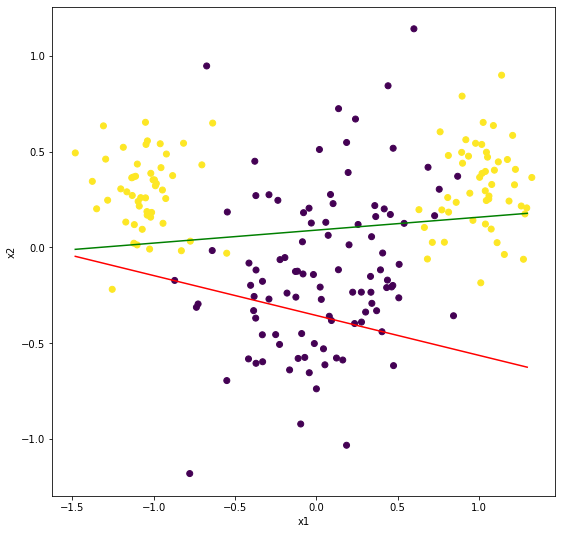



BATCH DELTA RULE - 25% OF EACH CLASS REMOVED
________________________________
Epoch 1  | Train_Sensitivity: 0.6133 | Train_Specificity: 0.5467
Epoch 1  - MSE of train_data: 0.4246  | MSE test_data: 0.4246
Epoch 2  | Train_Sensitivity: 0.56   | Train_Specificity: 0.5467
Epoch 2  - MSE of train_data: 0.3568  | MSE test_data: 0.3568
Epoch 3  | Train_Sensitivity: 0.56   | Train_Specificity: 0.5467
Epoch 3  - MSE of train_data: 0.3406  | MSE test_data: 0.3406
Epoch 4  | Train_Sensitivity: 0.56   | Train_Specificity: 0.5467
Epoch 4  - MSE of train_data: 0.3317  | MSE test_data: 0.3317
Epoch 5  | Train_Sensitivity: 0.56   | Train_Specificity: 0.5467
Epoch 5  - MSE of train_data: 0.3255  | MSE test_data: 0.3255
Epoch 6  | Train_Sensitivity: 0.5467 | Train_Specificity: 0.5467
Epoch 6  - MSE of train_data: 0.3208  | MSE test_data: 0.3208
Epoch 7  | Train_Sensitivity: 0.5333 | Train_Specificity: 0.5467
Epoch 7  - MSE of train_data: 0.3172  | MSE test_data: 0.3172
Epoch 8  | Train_Sensitivity: 0

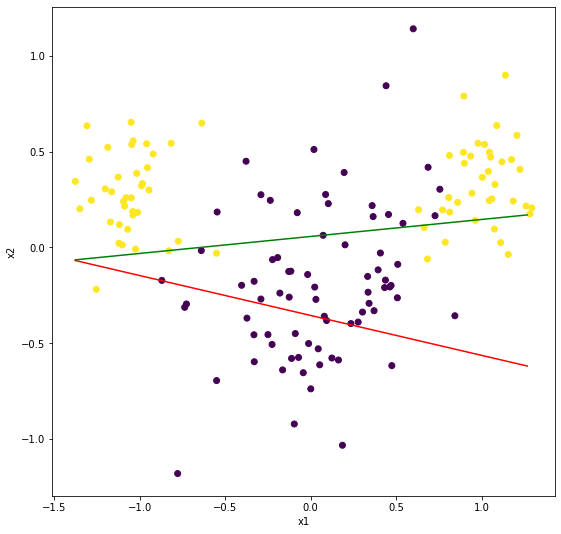



BATCH DELTA RULE - 50% OR CLASS A REMOVED
________________________________
(3, 50)
Epoch 1  | Train_Sensitivity: 0.38   | Train_Specificity: 0.55  
Epoch 1  - MSE of train_data: 0.5539  | MSE test_data: 0.5539
Epoch 2  | Train_Sensitivity: 0.28   | Train_Specificity: 0.59  
Epoch 2  - MSE of train_data: 0.3695  | MSE test_data: 0.3695
Epoch 3  | Train_Sensitivity: 0.28   | Train_Specificity: 0.6   
Epoch 3  - MSE of train_data: 0.3521  | MSE test_data: 0.3521
Epoch 4  | Train_Sensitivity: 0.28   | Train_Specificity: 0.6   
Epoch 4  - MSE of train_data: 0.3477  | MSE test_data: 0.3477
Epoch 5  | Train_Sensitivity: 0.3    | Train_Specificity: 0.6   
Epoch 5  - MSE of train_data: 0.3455  | MSE test_data: 0.3455
Epoch 6  | Train_Sensitivity: 0.34   | Train_Specificity: 0.6   
Epoch 6  - MSE of train_data: 0.3441  | MSE test_data: 0.3441
Epoch 7  | Train_Sensitivity: 0.36   | Train_Specificity: 0.6   
Epoch 7  - MSE of train_data: 0.3431  | MSE test_data: 0.3431
Epoch 8  | Train_Sensitivi

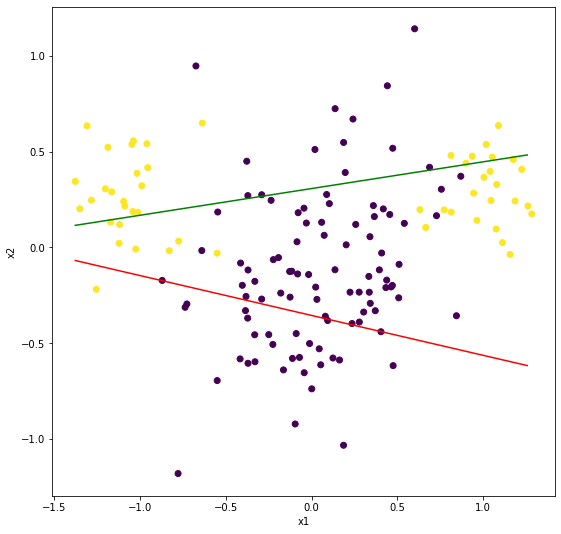



BATCH DELTA RULE - 50% OF CLASS B REMOVED
________________________________
(3, 50)
Epoch 1  | Train_Sensitivity: 0.63   | Train_Specificity: 0.38  
Epoch 1  - MSE of train_data: 0.3372  | MSE test_data: 0.3372
Epoch 2  | Train_Sensitivity: 0.63   | Train_Specificity: 0.42  
Epoch 2  - MSE of train_data: 0.3118  | MSE test_data: 0.3118
Epoch 3  | Train_Sensitivity: 0.63   | Train_Specificity: 0.5   
Epoch 3  - MSE of train_data: 0.301   | MSE test_data: 0.301
Epoch 4  | Train_Sensitivity: 0.63   | Train_Specificity: 0.5   
Epoch 4  - MSE of train_data: 0.294   | MSE test_data: 0.294
Epoch 5  | Train_Sensitivity: 0.63   | Train_Specificity: 0.5   
Epoch 5  - MSE of train_data: 0.2885  | MSE test_data: 0.2885
Epoch 6  | Train_Sensitivity: 0.63   | Train_Specificity: 0.52  
Epoch 6  - MSE of train_data: 0.2842  | MSE test_data: 0.2842
Epoch 7  | Train_Sensitivity: 0.63   | Train_Specificity: 0.52  
Epoch 7  - MSE of train_data: 0.2807  | MSE test_data: 0.2807
Epoch 8  | Train_Sensitivity

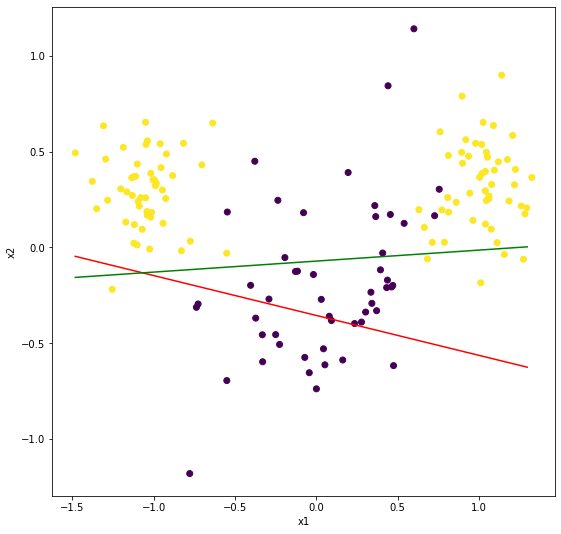



BATCH DELTA RULE - CLASS A SPECIAL SUBSAMPLE
________________________________
Epoch 1  | Train_Sensitivity: 0.5286 | Train_Specificity: 0.42  
Epoch 1  - MSE of train_data: 0.5186  | MSE test_data: 0.5186
Epoch 2  | Train_Sensitivity: 0.4714 | Train_Specificity: 0.43  
Epoch 2  - MSE of train_data: 0.3695  | MSE test_data: 0.3695
Epoch 3  | Train_Sensitivity: 0.4571 | Train_Specificity: 0.43  
Epoch 3  - MSE of train_data: 0.336   | MSE test_data: 0.336
Epoch 4  | Train_Sensitivity: 0.4429 | Train_Specificity: 0.43  
Epoch 4  - MSE of train_data: 0.3236  | MSE test_data: 0.3236
Epoch 5  | Train_Sensitivity: 0.4286 | Train_Specificity: 0.43  
Epoch 5  - MSE of train_data: 0.3184  | MSE test_data: 0.3184
Epoch 6  | Train_Sensitivity: 0.4286 | Train_Specificity: 0.43  
Epoch 6  - MSE of train_data: 0.316   | MSE test_data: 0.316
Epoch 7  | Train_Sensitivity: 0.4286 | Train_Specificity: 0.43  
Epoch 7  - MSE of train_data: 0.3147  | MSE test_data: 0.3147
Epoch 8  | Train_Sensitivity: 0.4

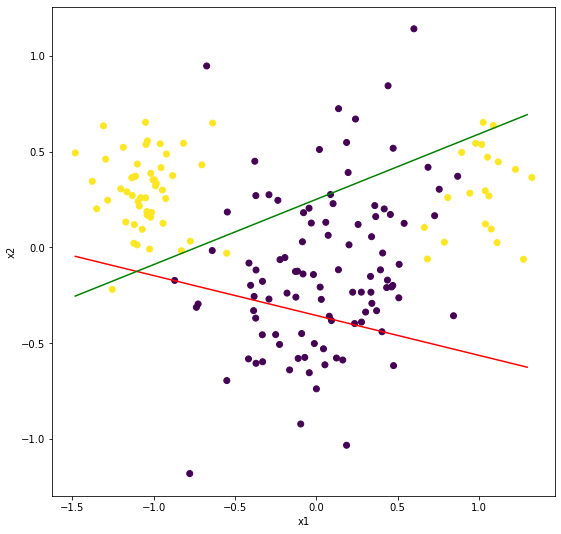

In [ ]:
EPOCHS = 30
LEARN_TYPE = "delta"
LEARNING_RATE = 0.005
EPS = 10e-4


def delta_batch(train_data, train_t, test_data, test_t):
  # Function for batch delta rule - first 2 inputs are for plotting data and
  # decision boundary.
  # second two are for the algorithm and can be either the entire dataset or
  # subsamples of it

  np.random.seed(12)
  weights = np.random.rand(3)

  positives = len(train_t[train_t == 1])
  negatives = len(train_t[train_t == -1])

  printData(train_data, train_t)
  printPartition(weights, train_data, "r")

  mse_array = []

  for s in range(EPOCHS):
    # e and MSE for subsampled data
    error_train = train_t - np.dot(weights.T, train_data)
    mse_train = np.square(error_train).mean()/2

    # e and MSE for all data
    error_test = test_t - np.dot(weights.T, test_data)
    mse_test = np.square(error_test).mean()/2

    delta_w = LEARNING_RATE * np.dot(error_train, train_data.T)
    weights += delta_w

    mse_array.append(mse_test)

    clf_train = np.dot(weights, train_data)
    clf_train[clf_train >= 0] = 1
    clf_train[clf_train < 0] = -1

    if positives > 0:
      true_positive = np.array([clf_train[i] == 1 and train_t[i] == 1 for i in range(n)])
      true_positive = len(true_positive[true_positive == 1])

      sensitivity = true_positive/positives  # True Positive rate
    else:
      sensitivity = 0.0

    if negatives > 0:
      true_negative = np.array([clf_train[i] == -1 and train_t[i] == -1 for i in range(n)])
      true_negative = len(true_negative[true_negative == 1])

      specificity = true_negative/negatives  # True Negative rate
    else:
      specificity = 0.0

    print("Epoch {:<2} | Train_Sensitivity: {:<6} | Train_Specificity: {:<6}".format(
        s+1, np.round(sensitivity, 4), np.round(specificity, 4)
    ))

    print("Epoch {:<2} - MSE of train_data: {:<7} | MSE test_data: {}"
    .format(s+1, np.round(mse_train, 4), np.round(mse_test, 4)))
    # Remove comment below to print boundary for every other epoch
    #if s % 2 != 0:
    #  printPartition(weights, train_data, "b")
  printPartition(weights, train_data, "g")
  plt.show()
  return mse_array


def multicluster_delta_test():
    plt.rcParams["figure.figsize"] = (9,9)
    np.random.seed(45)

    n = 100
    dist_A = [1.0, 0.3]
    dist_B = [0.0, -0.1]
    sigma_A, sigma_B = 0.2, 0.4

    inputs, targets = create_multicluster_data(n, 2, dist_A, sigma_A, dist_B, sigma_B)

    # Batch delta rule on entire dataset
    print("BATCH DELTA RULE - ALL INPUTS")
    print("________________________________")
    x, t = shuffle_data(inputs, targets)
    #delta_batch(inputs.T, targets, x, t)
    delta_batch(x, t, x, t)
    print("\n")

    # Batch delta rule where 25% of each class has been removed
    print("BATCH DELTA RULE - 25% OF EACH CLASS REMOVED")
    print("________________________________")
    train_data, train_t, test_data, test_t = first_subsample(n, inputs, targets)
    #delta_batch(train_data, train_t, test_data, test_t)
    delta_batch(train_data, train_t, train_data, train_t)
    print("\n")

    # Batch delta rule where 50% of class A has been removed
    print("BATCH DELTA RULE - 50% OR CLASS A REMOVED")
    print("________________________________")
    train_data, train_t, test_data, test_t = subsample_half(n, inputs, targets, "A")
    #delta_batch(train_data, train_t, test_data, test_t)
    delta_batch(train_data, train_t, train_data, train_t)
    print("\n")

    # Batch delta rule where 50% of class B has been removed
    print("BATCH DELTA RULE - 50% OF CLASS B REMOVED")
    print("________________________________")
    train_data, train_t, test_data, test_t = subsample_half(n, inputs, targets, "B")
    #delta_batch(train_data, train_t, test_data, test_t)
    delta_batch(train_data, train_t, train_data, train_t)
    print("\n")

    # Batch delta rule where 20% of class A inputs with x1-coord. less than
    # zero, and 80% of class A inputs with x1-coord. more than zero, has been
    # removed
    print("BATCH DELTA RULE - CLASS A SPECIAL SUBSAMPLE")
    print("________________________________")
    train_data, train_t, test_data, test_t = subsample_class_A(n, inputs, targets)
    #delta_batch(train_data, train_t, test_data, test_t)
    delta_batch(train_data, train_t, train_data, train_t)



multicluster_delta_test()

**Delta Rule batch on non-linearly separable data** \\

PERCEPTRON LEARING - ALL INPUTS
_______________________________
Epoch 1  | Train_Sensitivity: 0.37   | Train_Specificity: 0.88  
Epoch 2  | Train_Sensitivity: 0.27   | Train_Specificity: 0.91  
Epoch 3  | Train_Sensitivity: 0.21   | Train_Specificity: 0.93  
Epoch 4  | Train_Sensitivity: 0.42   | Train_Specificity: 0.88  
Epoch 5  | Train_Sensitivity: 0.45   | Train_Specificity: 0.86  
Epoch 6  | Train_Sensitivity: 0.38   | Train_Specificity: 0.91  
Epoch 7  | Train_Sensitivity: 0.24   | Train_Specificity: 0.91  
Epoch 8  | Train_Sensitivity: 0.39   | Train_Specificity: 0.91  
Epoch 9  | Train_Sensitivity: 0.24   | Train_Specificity: 0.91  
Epoch 10 | Train_Sensitivity: 0.39   | Train_Specificity: 0.91  
Epoch 11 | Train_Sensitivity: 0.37   | Train_Specificity: 0.88  
Epoch 12 | Train_Sensitivity: 0.37   | Train_Specificity: 0.88  
Epoch 13 | Train_Sensitivity: 0.33   | Train_Specificity: 0.91  
Epoch 14 | Train_Sensitivity: 0.29   | Train_Specificity: 0.91  
Epoch 15 | Train_Sensitivi

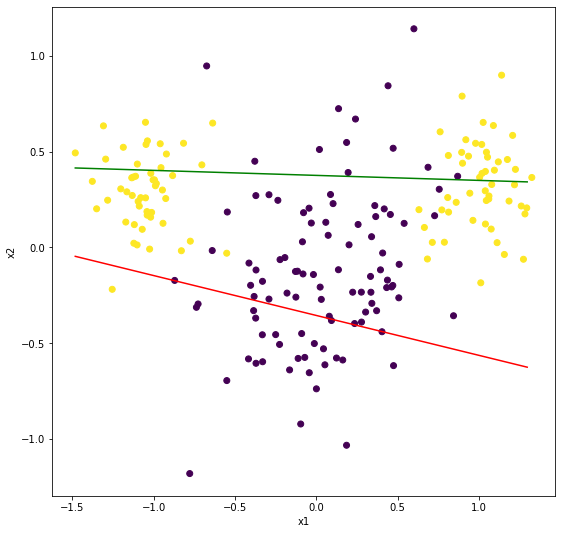

PERCEPTRON LEARNING - 25% OF EACH CLASS REMOVED
________________________________
Epoch 1  | Train_Sensitivity: 0.92   | Train_Specificity: 0.68  
Epoch 2  | Train_Sensitivity: 0.9867 | Train_Specificity: 0.6667
Epoch 3  | Train_Sensitivity: 0.9867 | Train_Specificity: 0.6667
Epoch 4  | Train_Sensitivity: 0.9867 | Train_Specificity: 0.6667
Epoch 5  | Train_Sensitivity: 0.9867 | Train_Specificity: 0.68  
Epoch 6  | Train_Sensitivity: 0.9867 | Train_Specificity: 0.68  
Epoch 7  | Train_Sensitivity: 0.8667 | Train_Specificity: 0.6933
Epoch 8  | Train_Sensitivity: 0.9867 | Train_Specificity: 0.68  
Epoch 9  | Train_Sensitivity: 0.8533 | Train_Specificity: 0.6933
Epoch 10 | Train_Sensitivity: 0.9867 | Train_Specificity: 0.6667
Epoch 11 | Train_Sensitivity: 0.9867 | Train_Specificity: 0.68  
Epoch 12 | Train_Sensitivity: 0.9867 | Train_Specificity: 0.6933
Epoch 13 | Train_Sensitivity: 0.9867 | Train_Specificity: 0.6933
Epoch 14 | Train_Sensitivity: 0.8533 | Train_Specificity: 0.6933
Epoch 15 

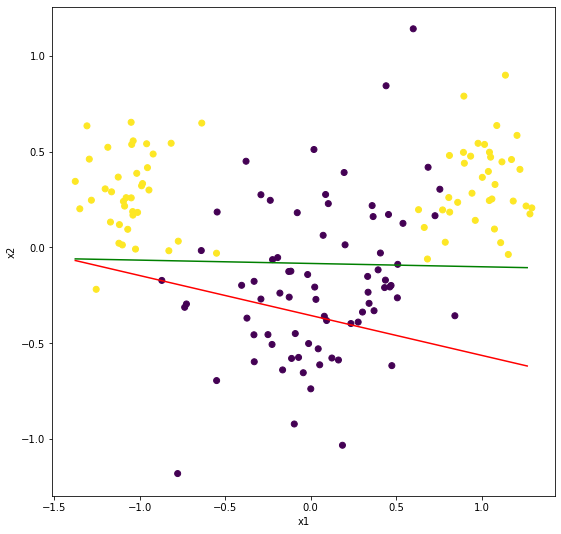



PERCEPTRON LEARNING - 50% OR CLASS A REMOVED
________________________________
(3, 50)
Epoch 1  | Train_Sensitivity: 0.5    | Train_Specificity: 0.86  
Epoch 2  | Train_Sensitivity: 0.36   | Train_Specificity: 0.88  
Epoch 3  | Train_Sensitivity: 0.46   | Train_Specificity: 0.87  
Epoch 4  | Train_Sensitivity: 0.46   | Train_Specificity: 0.87  
Epoch 5  | Train_Sensitivity: 0.52   | Train_Specificity: 0.48  
Epoch 6  | Train_Sensitivity: 0.44   | Train_Specificity: 0.88  
Epoch 7  | Train_Sensitivity: 0.44   | Train_Specificity: 0.87  
Epoch 8  | Train_Sensitivity: 0.46   | Train_Specificity: 0.87  
Epoch 9  | Train_Sensitivity: 0.46   | Train_Specificity: 0.89  
Epoch 10 | Train_Sensitivity: 0.5    | Train_Specificity: 0.86  
Epoch 11 | Train_Sensitivity: 0.48   | Train_Specificity: 0.87  
Epoch 12 | Train_Sensitivity: 0.46   | Train_Specificity: 0.88  
Epoch 13 | Train_Sensitivity: 0.54   | Train_Specificity: 0.48  
Epoch 14 | Train_Sensitivity: 0.46   | Train_Specificity: 0.88  
Ep

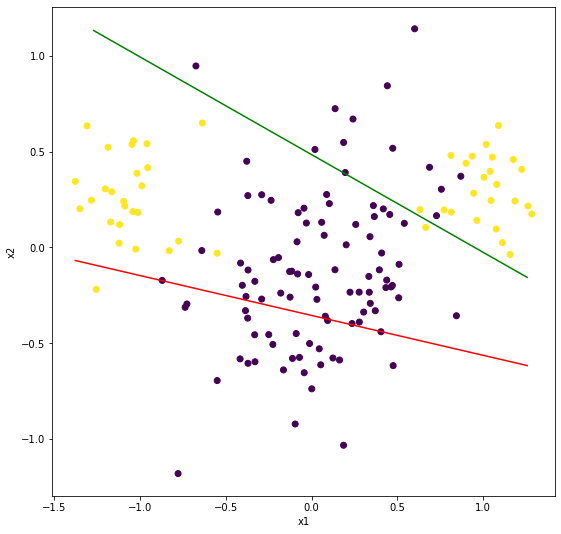



PERCEPTRON LEARNING - 50% OF CLASS B REMOVED
________________________________
(3, 50)
Epoch 1  | Train_Sensitivity: 0.99   | Train_Specificity: 0.68  
Epoch 2  | Train_Sensitivity: 0.98   | Train_Specificity: 0.68  
Epoch 3  | Train_Sensitivity: 0.98   | Train_Specificity: 0.68  
Epoch 4  | Train_Sensitivity: 0.99   | Train_Specificity: 0.68  
Epoch 5  | Train_Sensitivity: 0.98   | Train_Specificity: 0.68  
Epoch 6  | Train_Sensitivity: 0.99   | Train_Specificity: 0.68  
Epoch 7  | Train_Sensitivity: 1.0    | Train_Specificity: 0.18  
Epoch 8  | Train_Sensitivity: 0.98   | Train_Specificity: 0.68  
Epoch 9  | Train_Sensitivity: 0.89   | Train_Specificity: 0.62  
Epoch 10 | Train_Sensitivity: 0.98   | Train_Specificity: 0.68  
Epoch 11 | Train_Sensitivity: 0.98   | Train_Specificity: 0.68  
Epoch 12 | Train_Sensitivity: 0.98   | Train_Specificity: 0.68  
Epoch 13 | Train_Sensitivity: 0.98   | Train_Specificity: 0.68  
Epoch 14 | Train_Sensitivity: 0.98   | Train_Specificity: 0.68  
Ep

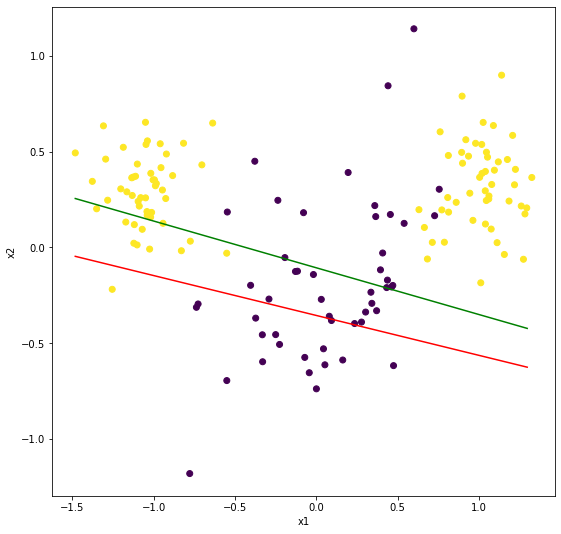



PERCEPTRON LEARNING - CLASS A SPECIAL SUBSAMPLE
________________________________
Epoch 1  | Train_Sensitivity: 0.7    | Train_Specificity: 0.95  
Epoch 2  | Train_Sensitivity: 0.7    | Train_Specificity: 0.91  
Epoch 3  | Train_Sensitivity: 0.7    | Train_Specificity: 0.94  
Epoch 4  | Train_Sensitivity: 0.7    | Train_Specificity: 0.95  
Epoch 5  | Train_Sensitivity: 0.6571 | Train_Specificity: 0.92  
Epoch 6  | Train_Sensitivity: 0.6714 | Train_Specificity: 0.96  
Epoch 7  | Train_Sensitivity: 0.5    | Train_Specificity: 0.92  
Epoch 8  | Train_Sensitivity: 0.4143 | Train_Specificity: 0.92  
Epoch 9  | Train_Sensitivity: 0.7    | Train_Specificity: 0.96  
Epoch 10 | Train_Sensitivity: 0.7    | Train_Specificity: 0.95  
Epoch 11 | Train_Sensitivity: 0.6571 | Train_Specificity: 0.91  
Epoch 12 | Train_Sensitivity: 0.7    | Train_Specificity: 0.95  
Epoch 13 | Train_Sensitivity: 0.6571 | Train_Specificity: 0.92  
Epoch 14 | Train_Sensitivity: 0.7    | Train_Specificity: 0.95  
Epoch 1

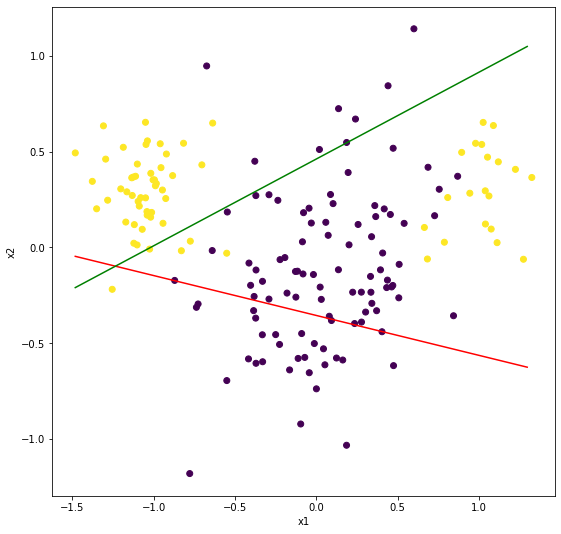

In [ ]:
EPOCHS = 20
LEARN_TYPE = "perceptron"

def perceptron_subsamples(train_data, train_t, test_data, test_t):
    np.random.seed(12)

    positives = len(train_t[train_t == 1])
    negatives = len(train_t[train_t == 0])

    n = len(train_t)
    w_perceptron = np.random.rand(3)
    lr_perceptron = 1

    printData(train_data, train_t)
    printPartition(w_perceptron, train_data, "r")

    for s in range(EPOCHS):  # How many times the algorithm go through the dataset (epochs)
        for i in range(n):
            y_prime = np.dot(w_perceptron.T, train_data[:, i])
            clf = check_treshold(y_prime)

            if clf == 0 and train_t[i] == 1:  # false negative error
                w_perceptron = w_perceptron + lr_perceptron * train_data[:, i]
            elif clf == 1 and train_t[i] == 0:  # false positive error
                w_perceptron = w_perceptron - lr_perceptron * train_data[:, i]

        clf_train = np.dot(w_perceptron, train_data)
        clf_train[clf_train >= 0] = 1
        clf_train[clf_train < 0] = 0

        if positives > 0:
          true_positive = np.array([clf_train[i] == 1 and train_t[i] == 1 for i in range(n)])
          true_positive = len(true_positive[true_positive == 1])

          sensitivity = true_positive/positives  # True Positive rate
        else:
          sensitivity = 0.0

        if negatives > 0:
          true_negative = np.array([clf_train[i] == 0 and train_t[i] == 0 for i in range(n)])
          true_negative = len(true_negative[true_negative == 1])

          specificity = true_negative/negatives  # True Negative rate
        else:
          specificity = 0.0

        print("Epoch {:<2} | Train_Sensitivity: {:<6} | Train_Specificity: {:<6}".format(
            s+1, np.round(sensitivity, 4), np.round(specificity, 4)
        ))
        #if s % 2 != 0:
        #  printPartition(w_perceptron, train_data, color="b")

    printPartition(w_perceptron, train_data, color="g")
    plt.show()


def multicluster_perceptron_test():
    plt.rcParams["figure.figsize"] = (9,9)
    np.random.seed(45)

    n = 100
    dist_A = [1.0, 0.3]
    dist_B = [0.0, -0.1]
    sigma_A, sigma_B = 0.2, 0.4

    inputs, targets = create_multicluster_data(n, 2, dist_A, sigma_A, dist_B, sigma_B)


    # Perceptron Learning - All inputs
    print("PERCEPTRON LEARING - ALL INPUTS")
    print("_______________________________")
    x, t = shuffle_data(inputs, targets)
    perceptron_subsamples(x, t, x, t)

    # Perceptron Learning where 25% of each class has been removed
    print("PERCEPTRON LEARNING - 25% OF EACH CLASS REMOVED")
    print("________________________________")
    train_data, train_t, test_data, test_t = first_subsample(n, inputs, targets)
    #perceptron_subsamples(train_data, train_t, test_data, test_t)
    perceptron_subsamples(train_data, train_t, train_data, train_t)
    print("\n")

    # Perceptron Learning where 50% of class A has been removed
    print("PERCEPTRON LEARNING - 50% OR CLASS A REMOVED")
    print("________________________________")
    train_data, train_t, test_data, test_t = subsample_half(n, inputs, targets, "A")
    #perceptron_subsamples(train_data, train_t, test_data, test_t)
    perceptron_subsamples(train_data, train_t, train_data, train_t)
    print("\n")

    # Perceptron Learning where 50% of class B has been removed
    print("PERCEPTRON LEARNING - 50% OF CLASS B REMOVED")
    print("________________________________")
    train_data, train_t, test_data, test_t = subsample_half(n, inputs, targets, "B")
    #perceptron_subsamples(train_data, train_t, test_data, test_t)
    perceptron_subsamples(train_data, train_t, train_data, train_t)
    print("\n")

    # Perceptron learning where 20% of class A inputs with x1-coord. less than
    # zero, and 80% of class A inputs with x1-coord. more than zero, has been
    # removed
    print("PERCEPTRON LEARNING - CLASS A SPECIAL SUBSAMPLE")
    print("________________________________")
    train_data, train_t, test_data, test_t = subsample_class_A(n, inputs, targets)
    #perceptron_subsamples(train_data, train_t, test_data, test_t)
    perceptron_subsamples(train_data, train_t, train_data, train_t)

multicluster_perceptron_test()
